In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: astunparse>=1.6.0 in c:\programdata\anaconda3\lib\site-packages (from tensorflow-intel==2.12.0->tensorflow) (1.6.3)



In [2]:
from keras.models import Sequential

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

#df = pd.read_csv('META LSTM.csv')
df = pd.read_csv('PFE LSTM.csv')
#df = pd.read_excel('TSLA LSTM.xlsx')
#df = pd.read_excel('WMT LSTM.xlsx')

#df = pd.read_csv('Stock Prices updated.csv')

df = df[['Symbol','Date','Open','High','Low','Close','Adj Close','Volume']]

df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,PFE,2/28/22,45.276410,46.820000,47.169998,46.340000,46.939999,35296100
1,PFE,3/1/22,45.150692,46.689999,47.139999,45.439999,45.750000,29854500
2,PFE,3/2/22,44.589819,46.110001,47.930000,46.000000,47.700001,36516200
3,PFE,3/3/22,46.108057,47.680000,48.590000,47.480000,47.830002,30553300
4,PFE,3/4/22,45.933990,47.500000,48.770000,47.410000,48.650002,33217300
...,...,...,...,...,...,...,...,...
245,PFE,2/17/23,42.889999,42.889999,43.369999,42.580002,43.209999,18293400
246,PFE,2/21/23,42.810001,42.810001,42.930000,42.619999,42.700001,17356600
247,PFE,2/22/23,42.720001,42.720001,42.889999,42.310001,42.380001,17394200
248,PFE,2/23/23,42.290001,42.290001,42.750000,42.220001,42.299999,21104300


In [5]:
df['returns'] = df.Close.pct_change()

In [6]:
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,PFE,2/28/22,45.276410,46.820000,47.169998,46.340000,46.939999,35296100,NaN
1,PFE,3/1/22,45.150692,46.689999,47.139999,45.439999,45.750000,29854500,-0.019422
2,PFE,3/2/22,44.589819,46.110001,47.930000,46.000000,47.700001,36516200,0.012324
3,PFE,3/3/22,46.108057,47.680000,48.590000,47.480000,47.830002,30553300,0.032174
4,PFE,3/4/22,45.933990,47.500000,48.770000,47.410000,48.650002,33217300,-0.001474
...,...,...,...,...,...,...,...,...,...
245,PFE,2/17/23,42.889999,42.889999,43.369999,42.580002,43.209999,18293400,-0.004442
246,PFE,2/21/23,42.810001,42.810001,42.930000,42.619999,42.700001,17356600,0.000939
247,PFE,2/22/23,42.720001,42.720001,42.889999,42.310001,42.380001,17394200,-0.007274
248,PFE,2/23/23,42.290001,42.290001,42.750000,42.220001,42.299999,21104300,-0.002127


In [7]:
df['log_returns'] = np.log(1+ df['returns'])
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns,log_returns
0,PFE,2/28/22,45.276410,46.820000,47.169998,46.340000,46.939999,35296100,NaN,NaN
1,PFE,3/1/22,45.150692,46.689999,47.139999,45.439999,45.750000,29854500,-0.019422,-0.019613
2,PFE,3/2/22,44.589819,46.110001,47.930000,46.000000,47.700001,36516200,0.012324,0.012249
3,PFE,3/3/22,46.108057,47.680000,48.590000,47.480000,47.830002,30553300,0.032174,0.031667
4,PFE,3/4/22,45.933990,47.500000,48.770000,47.410000,48.650002,33217300,-0.001474,-0.001475
...,...,...,...,...,...,...,...,...,...,...
245,PFE,2/17/23,42.889999,42.889999,43.369999,42.580002,43.209999,18293400,-0.004442,-0.004452
246,PFE,2/21/23,42.810001,42.810001,42.930000,42.619999,42.700001,17356600,0.000939,0.000939
247,PFE,2/22/23,42.720001,42.720001,42.889999,42.310001,42.380001,17394200,-0.007274,-0.007300
248,PFE,2/23/23,42.290001,42.290001,42.750000,42.220001,42.299999,21104300,-0.002127,-0.002129


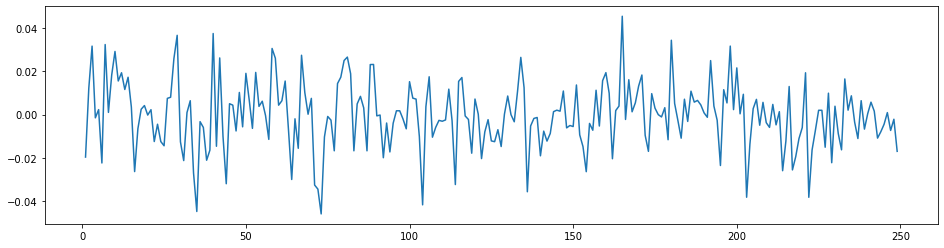

In [8]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (16,4))
plt.plot(df.log_returns)


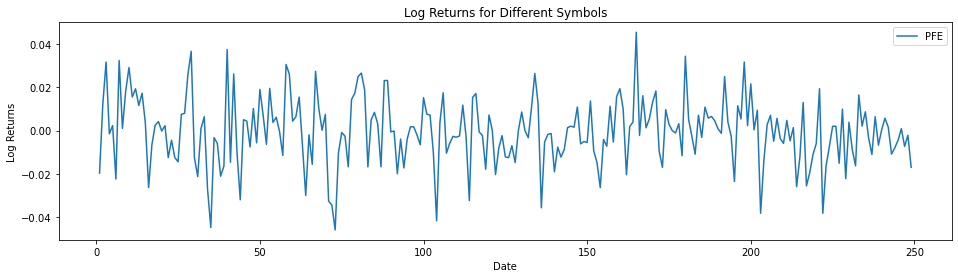

In [9]:
grouped_data = df.groupby("Symbol")

# Loop through each group and plot the data
plt.figure(1, figsize=(16, 4))
for symbol, group in grouped_data:
    plt.plot(group["log_returns"], label=symbol)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns for Different Symbols")
plt.legend()

# Show the plot
plt.show()

### Preprocessing Steps

In [10]:
df.dropna(inplace = True)
X = df[['Close','log_returns']].values
X

array([[ 4.54399986e+01, -1.96127780e-02],
       [ 4.60000000e+01,  1.22486522e-02],
       [ 4.74799995e+01,  3.16671636e-02],
       [ 4.74099998e+01, -1.47538630e-03],
       [ 4.75200005e+01,  2.31751098e-03],
       [ 4.64700012e+01, -2.23437154e-02],
       [ 4.80000000e+01,  3.23940416e-02],
       [ 4.80499992e+01,  1.04110869e-03],
       [ 4.89399986e+01,  1.83529104e-02],
       [ 5.03899994e+01,  2.91977006e-02],
       [ 5.11800003e+01,  1.55561062e-02],
       [ 5.21800003e+01,  1.93504489e-02],
       [ 5.27900009e+01,  1.16225106e-02],
       [ 5.37099991e+01,  1.72773905e-02],
       [ 5.39000015e+01,  3.53131951e-03],
       [ 5.25000000e+01, -2.63173367e-02],
       [ 5.21599998e+01, -6.49725485e-03],
       [ 5.22900009e+01,  2.48925105e-03],
       [ 5.25099983e+01,  4.19842986e-03],
       [ 5.25000000e+01, -1.90426058e-04],
       [ 5.26199989e+01,  2.28308568e-03],
       [ 5.19700012e+01, -1.24296028e-02],
       [ 5.17400017e+01, -4.43544327e-03],
       [ 5.

In [11]:
X

array([[ 4.54399986e+01, -1.96127780e-02],
       [ 4.60000000e+01,  1.22486522e-02],
       [ 4.74799995e+01,  3.16671636e-02],
       [ 4.74099998e+01, -1.47538630e-03],
       [ 4.75200005e+01,  2.31751098e-03],
       [ 4.64700012e+01, -2.23437154e-02],
       [ 4.80000000e+01,  3.23940416e-02],
       [ 4.80499992e+01,  1.04110869e-03],
       [ 4.89399986e+01,  1.83529104e-02],
       [ 5.03899994e+01,  2.91977006e-02],
       [ 5.11800003e+01,  1.55561062e-02],
       [ 5.21800003e+01,  1.93504489e-02],
       [ 5.27900009e+01,  1.16225106e-02],
       [ 5.37099991e+01,  1.72773905e-02],
       [ 5.39000015e+01,  3.53131951e-03],
       [ 5.25000000e+01, -2.63173367e-02],
       [ 5.21599998e+01, -6.49725485e-03],
       [ 5.22900009e+01,  2.48925105e-03],
       [ 5.25099983e+01,  4.19842986e-03],
       [ 5.25000000e+01, -1.90426058e-04],
       [ 5.26199989e+01,  2.28308568e-03],
       [ 5.19700012e+01, -1.24296028e-02],
       [ 5.17400017e+01, -4.43544327e-03],
       [ 5.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)).fit(X)
X_scaled = scaler.transform(X)

In [13]:
X_scaled[:5]

array([[0.30668704, 0.28754817],
       [0.34973096, 0.63631615],
       [0.46348959, 0.84887895],
       [0.45810914, 0.48608733],
       [0.46656422, 0.5276059 ]])

In [14]:
y = [x[0] for x in X_scaled]

y[:5]

[0.30668703960293797,
 0.34973096291683436,
 0.4634895894436979,
 0.4581091360202416,
 0.46656421858784647]

In [15]:
split = int(len(X_scaled) * 0.7 )

print(split)

174


In [16]:
x_train = X_scaled[:split]
x_test = X_scaled[split : len(X_scaled)]

y_train = y[:split]
y_test = y[split : len(y)]

In [17]:
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

In [18]:
n =3 

xtrain = []
ytrain = []

xtest = []
ytest = []

for i in range(n, len(x_train)):
    xtrain.append(x_train[i - n : i, : x_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
    
for i in range(n, len(x_test)):
    xtest.append(x_test[i - n : i, : x_test.shape[1]])
    ytest.append(y_test[i])  # predict next record
    

In [19]:
ytest

[0.4150652119377063,
 0.3735588960475744,
 0.4980784309586288,
 0.5172944211417851,
 0.5073020240021058,
 0.46733272906371903,
 0.4934664872424057,
 0.4819370691509821,
 0.5219063640893689,
 0.5434281793204718,
 0.5680246229270844,
 0.5849347880622937,
 0.5880091235861129,
 0.5833974742588586,
 0.6787086210784383,
 0.6940814716415735,
 0.6840890745018946,
 0.5941583818744101,
 0.637970815664179,
 0.6587241204194094,
 0.7824751440859523,
 0.7916987371294293,
 0.878555095001734,
 0.8800924095738081,
 0.9185243899401208,
 0.7647964684748705,
 0.7109916367767832,
 0.7217525443923347,
 0.7494236171430959,
 0.7302076269599396,
 0.7524982462872445,
 0.7378939061999814,
 0.7148347763968044,
 0.7332822561040881,
 0.7148347763968044,
 0.7202152298202602,
 0.6202921400530972,
 0.5741735875950518,
 0.6233667684286064,
 0.5272868175128251,
 0.455803310972295,
 0.41583401603390824,
 0.39431220080280527,
 0.46425839353989984,
 0.32744034358952945,
 0.2705611771362628,
 0.24519592943344826,
 0.2521136

In [20]:
xtrain[0]
#y_train[0]

array([[0.30668704, 0.28754817],
       [0.34973096, 0.63631615],
       [0.46348959, 0.84887895]])

In [21]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [22]:
scaler.inverse_transform(val)

array([[ 4.74099998e+01, -4.58815201e-02]])

In [23]:
xtrain, ytrain = (np.array(xtrain), np.array(ytrain))
xtrain  = np.reshape( xtrain, (xtrain.shape[0], xtrain.shape[1],xtrain.shape[2]))
                  
xtest, ytest = (np.array(xtest), np.array(ytest))
xtest  = np.reshape( xtest, (xtest.shape[0], xtest.shape[1], xtest.shape[2]))


In [24]:
print(xtrain.shape)
print(ytrain.shape)

print("----")

print(xtest.shape)
print(ytest.shape)

(171, 3, 2)
(171,)
----
(72, 3, 2)
(72,)


In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [26]:
model = Sequential()

model.add(LSTM(4, input_shape = (xtrain.shape[1], xtrain.shape[2])))

model.add(Dense(1))

model.compile(loss = "mean_squared_error",optimizer = "adam")

model.fit(
xtrain, ytrain, epochs = 25, validation_data = (xtest, ytest), batch_size = 16, verbose = 1
)

Epoch 1/25
11/11 [==============================] - 3s 54ms/step - loss: 0.3205 - val_loss: 0.1886
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 0.2490 - val_loss: 0.1410
Epoch 3/25
11/11 [==============================] - 0s 6ms/step - loss: 0.1866 - val_loss: 0.1070
Epoch 4/25
11/11 [==============================] - 0s 6ms/step - loss: 0.1410 - val_loss: 0.0824
Epoch 5/25
11/11 [==============================] - 0s 6ms/step - loss: 0.1054 - val_loss: 0.0665
Epoch 6/25
11/11 [==============================] - 0s 7ms/step - loss: 0.0823 - val_loss: 0.0570
Epoch 7/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0649 - val_loss: 0.0532
Epoch 8/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0553 - val_loss: 0.0523
Epoch 9/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0492 - val_loss: 0.0530
Epoch 10/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0464 - val_loss: 0.0538
Epoch 11/25
11/11 

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 112       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [28]:
trainpredict = model.predict(xtrain)

testpredict = model.predict(xtest)


3/3 [==============================] - 0s 3ms/step


In [29]:
trainpredict = np.c_[trainpredict,np.zeros(trainpredict.shape)]

testpredict = np.c_[testpredict,np.zeros(testpredict.shape)]

In [30]:
## Invert Predictions

trainpredict = scaler.inverse_transform(trainpredict)
trainpredict = [x[0] for x in trainpredict]

testpredict = scaler.inverse_transform(testpredict)
testpredict = [x[0] for x in testpredict]



In [31]:
print(trainpredict[:5])
print(testpredict[:5])


[48.430384892101124, 49.31042546459073, 49.23751706059531, 48.149898460840085, 48.51428383863884]
[48.363808089027025, 48.34690546743706, 48.157729794300515, 48.66081251553914, 49.16404257348017]


In [32]:
## calculate mean squared error 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

trainscore_mse = mean_squared_error([x[0][0]  for x in xtrain], trainpredict, squared = False )
trainscore_rmse = sqrt(trainscore_mse)
trainscore_mae = mean_absolute_error([x[0][0]  for x in xtrain], trainpredict)
r2_train = r2_score([x[0][0]  for x in xtrain], trainpredict)

print("Train Score: %.2f MSE" % (trainscore_mse))
print("Train Score: %.2f RMSE" % (trainscore_rmse))
print("Train Score: %.2f MAE" % (trainscore_mae))
print("Train Score: %.2f R2 Score" % (r2_train))

testscore_mse = mean_squared_error([x[0][0]  for x in xtest], testpredict, squared = False )
testscore_rmse = sqrt(testscore_mse)
testscore_mae = mean_absolute_error([x[0][0]  for x in xtest], testpredict)
r2_test = r2_score([x[0][0]  for x in xtest], testpredict)

print("Test Score: %.2f RMSE" % (testscore_mse))
print("Test Score: %.2f RMSE" % (testscore_rmse))
print("Test Score: %.2f MAE" % (testscore_mae))
print("Test Score: %.2f R2 Score" % (r2_test))


Train Score: 48.26 MSE
Train Score: 6.95 RMSE
Train Score: 48.25 MAE
Train Score: -38688.07 R2 Score
Test Score: 47.88 RMSE
Test Score: 6.92 RMSE
Test Score: 47.87 MAE
Test Score: -39933.57 R2 Score


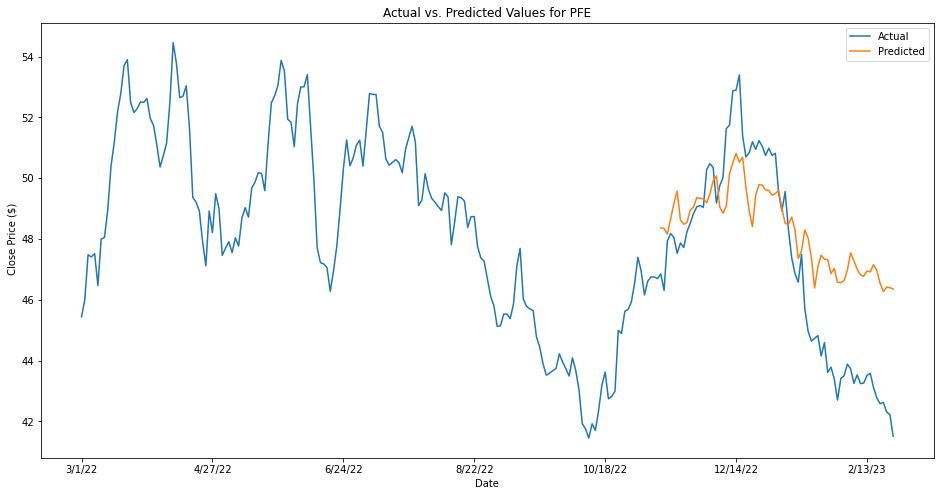

In [33]:
import matplotlib.pyplot as plt


# Set figure size and create axes object
fig, ax = plt.subplots(figsize=(16, 8))

# Plot actual and predicted values
ax.plot(df['Date'], df['Close'], label='Actual')
ax.plot(df.iloc[split+n:]['Date'], testpredict, label='Predicted')

# Add labels and legend
ax.set_title('Actual vs. Predicted Values for PFE')
ax.set_xlabel('Date')
ax.set_ylabel(' Close Price ($)')
ax.legend()

# Format x-axis date labels
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

# Show the plot
plt.show()

In [34]:
import pandas as pd

# Load original data into a DataFrame
df = pd.read_csv('PFE LSTM.csv', index_col='Date', parse_dates=True)

# Extract the dates from the test data
dates = df.index[-len(testpredict):]

# Create a new DataFrame with the predicted values
predictions = pd.DataFrame({'Predictions': testpredict}, index=dates)

# Concatenate the original "Close" column with the predicted values
result = pd.concat([df['Close'], predictions], axis=1)


In [35]:
result = result.tail(30)

result.to_csv('PFE Actual and predicted prices updated.csv')